# Identifier and contextual metadata example 
In this example we are looking for a specimen that is a bird's nest. Currently GBIF data only indicates that this is a Preserved Specimen (the museum portal has this information but uses the ABCD term kindOfUnit). We want to find out more about this nest. For this demo we created a simple Digital Specimen. 

In [1]:

# Load the libraries 
from IPython.display import Markdown as md
import urllib.request, json, requests

# Look for nests in the digital object repository 
myquery= "http://nsidr.org/objects/?query=nest"
req = requests.get(myquery)
jsonres = json.loads(req.content)

In [2]:
# Give me the authoritative section from this object 
authoritative_json_object = jsonres['results'][0]['content']['ods:authoritative']

print(json.dumps(authoritative_json_object, indent=4, sort_keys=True))


{
    "ods:curatedObjectID": "https://data.biodiversitydata.nl/naturalis/specimen/ZMA.AVES.64793",
    "ods:institution": "https://ror.org/0566bfb96",
    "ods:institutionCode": "Naturalis",
    "ods:midsLevel": 1,
    "ods:name": "Turdus merula merula",
    "ods:objectType": "Bird's nest"
}


The elements in this digital object are part of the Open Digital Specimen standards work. To find out more check our github repo: https://github.com/DiSSCo/openDS 

In [3]:
display(md("<b>Now we have contextual information about this object including the related identifiers.</b>"))

<b>Now we have contextual information about this object including the related identifiers.</b>

In [4]:
display(md("From the JSON object I can get the image and other supplementary information about this nest."))

From the JSON object I can get the image and other supplementary information about this nest.

In [5]:
# Give me the image section from this object 
authoritative_json_object = jsonres['results'][0]['content']['ods:images']

print(json.dumps(authoritative_json_object, indent=4, sort_keys=True))


{
    "ods.imageResolutionUnit": "inches",
    "ods:colorSpace": "sRGB",
    "ods:creator": "",
    "ods:iccProfileName": "ICC Profile data not found",
    "ods:imageHeight": 4016,
    "ods:imageSizeUnit": "pixel",
    "ods:imageURI": "https://medialib.naturalis.nl/file/id/ZMA.AVES.64793/",
    "ods:imageWidth": 6017,
    "ods:xResolution": 300,
    "ods:yResolution": 300
}


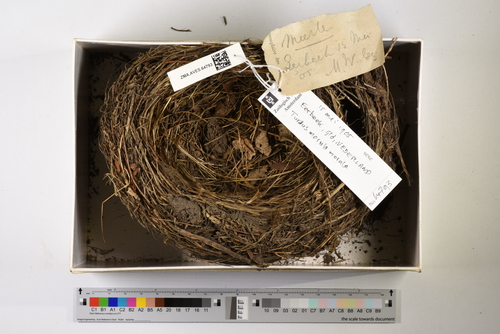

In [6]:
# display image 

import IPython.display as Disp
imageURI = jsonres['results'][0]['content']['ods:images']['ods:imageURI']
Disp.Image(requests.get(imageURI).content)

In [7]:
# give me supplementary data 
supplementary_json_object = jsonres['results'][0]['content']['ods:supplementary']
print(json.dumps(supplementary_json_object, indent=4, sort_keys=True))


{
    "dwc:recordedBy": "Weber Max",
    "dwc:recordedByID": "https://www.wikidata.org/wiki/Q63149",
    "gbifId": "https://www.gbif.org/occurrence/2434245775"
}


In [8]:
# Using the wikidata identifier I can get more information either from 
# wikidata or services like bionomia 
from urllib.request import urlopen
response = urlopen('https://bionomia.net/Q63149/specimens.json')
bionomia_json_object = json.load(response)
print(json.dumps(bionomia_json_object['alternateName'], indent=4, sort_keys=True))


[
    "Max Carl Wilhelm Weber",
    "Max Weber",
    "Weber",
    "M.W.C. Weber",
    "Max Carl Wilhelm Weber van Bosse"
]


Similarly using the gbifid we can find out more about the specimen. Currently, all these elements are siloed or missing context. For instance, the gbif record only mentions this is a "Preserved specimen". We cannot tell that this is a nest. The collector identifier is missing both from the Naturalis and gbif records. Without the identifier, we cannot tell who this Max Weber is (this is a different Max Weber than the famous sociologist). 